32357 25
2612 18
4190 20
5326 20
5021 20
5701 21
5840 22
8284 20
8069 22
8237 23


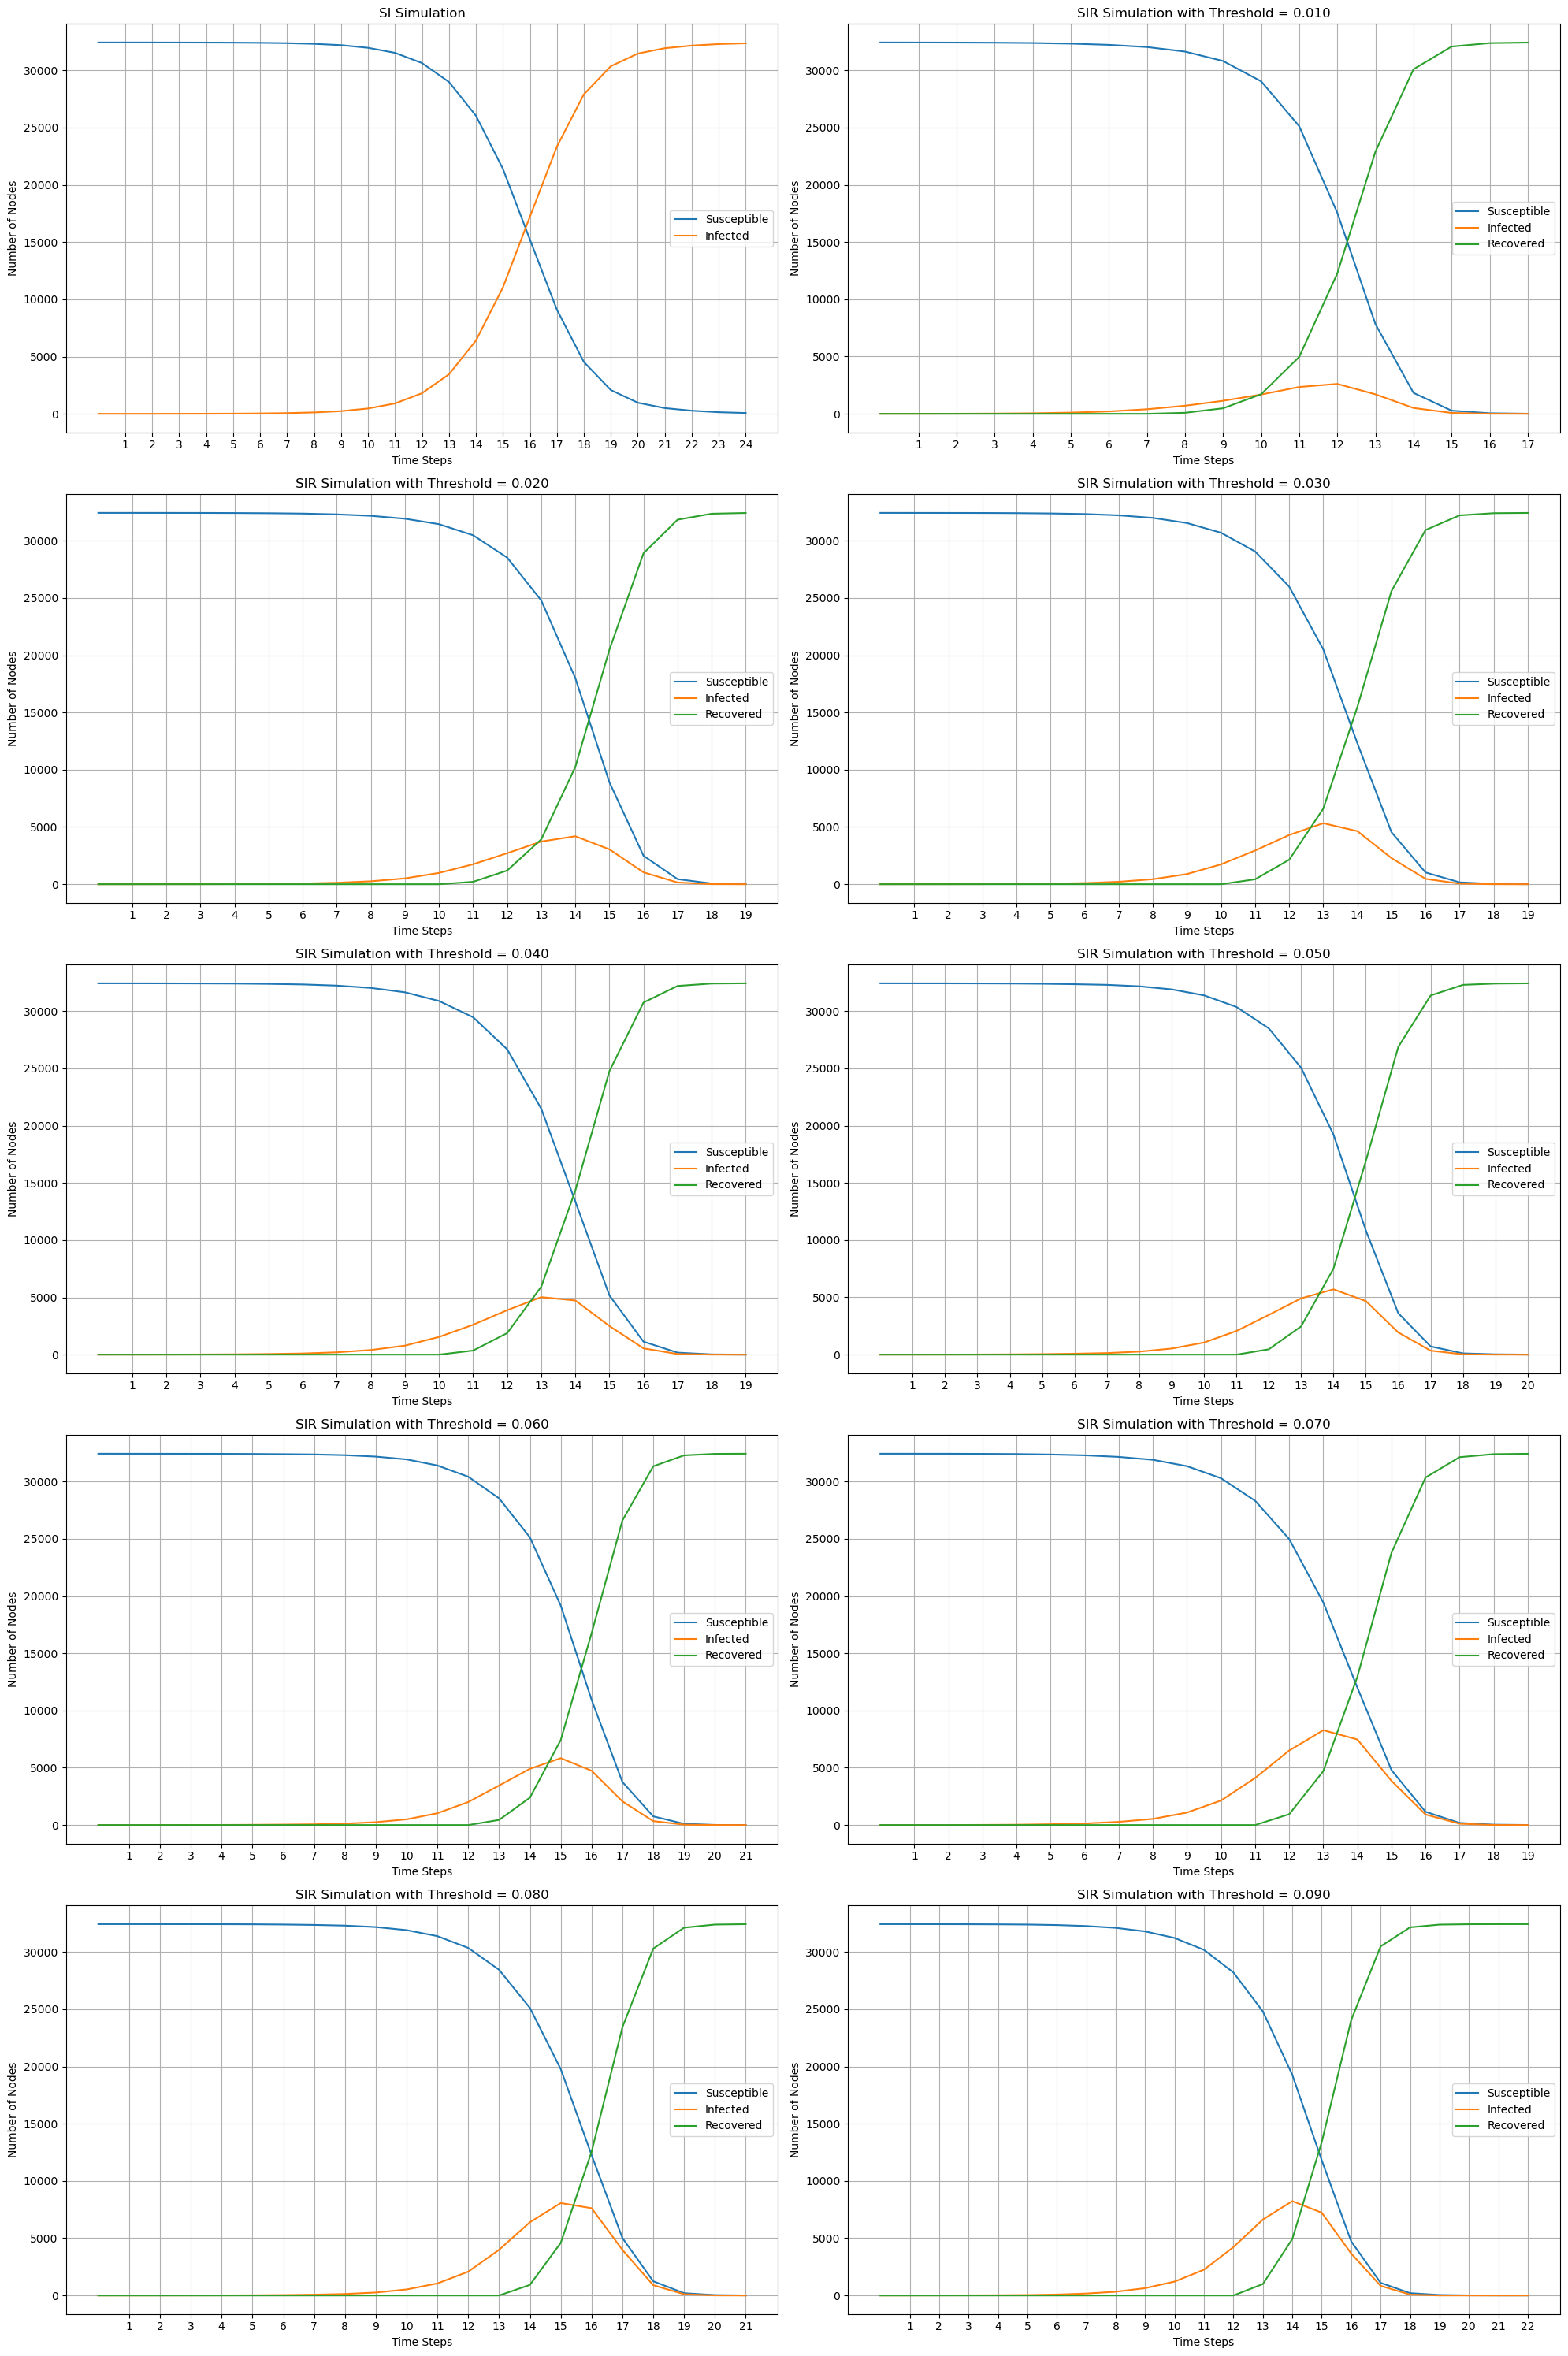

In [21]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file and create the graph
file_path = 'data\\final_final_random_graph.csv'  # Update with the actual path to your file data\final_final_random_graph.csv
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5      # Transmission probability
gamma = 0.23    # Recovery probability
initial_infected = 1
time_steps = 25  # Adjust based on required duration

# Initialize plot
plt.figure(figsize=(20, 30))

# Loop through thresholds from 0.1 to 0.9
for i, recovery_threshold in enumerate(np.arange(0.0, 0.1, 0.01), start=1):
    # Initialize states
    if recovery_threshold == 0.0:
        gamma = 0
    else:
        gamma = 0.23
    nodes = list(G.nodes)
    n = len(nodes)
    infected_nodes = np.random.choice(nodes, replace=False)
    node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
    node_states[infected_nodes] = 'I'
#     node_states[102] = 'R'  # Make sure a node starts as recovered
    
    # Record initial state counts
    susceptible_counts = [n - initial_infected]
    infected_counts = [initial_infected]
    recovered_counts = [0]

    # Simulation loop
    for t in range(1, time_steps):
        new_states = node_states.copy()
        for node in nodes:
            if node_states[node] == 'I':  # Infected node
                # Spread to neighbors
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' and np.random.rand() < beta:
                        new_states[neighbor] = 'I'
                # Recover
                if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                    new_states[node] = 'R'
                    
            if node_states[node] == 'R':  # Recovered node spreads immunity
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                        new_states[neighbor] = 'R'
        
        # Update states
        node_states = new_states
        susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
        infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
        recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
        
        # Break if no more infected
        if infected_counts[-1] == 0:
            break
    print(max(infected_counts), len(infected_counts))
    # Plot results for the current threshold
    plt.subplot(5, 2, i)
    if recovery_threshold == 0.0:
        plt.title("SI Simulation")
        plt.plot(susceptible_counts, label="Susceptible")
        plt.plot(infected_counts, label="Infected")
        plt.xlabel("Time Steps")
        plt.ylabel("Number of Nodes")
        plt.xticks(ticks = range(1, len(susceptible_counts)))
        plt.legend()
        plt.grid()
    else:
        plt.title(f"SIR Simulation with Threshold = {recovery_threshold:.3f}")
        plt.plot(susceptible_counts, label="Susceptible")
        plt.plot(infected_counts, label="Infected")
        plt.plot(recovered_counts, label="Recovered")
        plt.xlabel("Time Steps")
        plt.ylabel("Number of Nodes")
        plt.xticks(ticks = range(1, len(susceptible_counts)))
        plt.legend()
        plt.grid()

# Adjust layout and display all plots
plt.tight_layout()
plt.show()


1,0.1:  32355 100
1,0.2:  32430 79
1,0.5:  32430 31
2,0.1:  32388 100
2,0.2:  32430 73
2,0.5:  32430 30
{'1,0.1': [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 5, 8, 10, 12, 18, 23, 28, 39, 54, 63, 74, 92, 112, 134, 164, 193, 226, 269, 335, 399, 476, 574, 686, 827, 993, 1206, 1441, 1750, 2077, 2459, 2933, 3449, 4077, 4782, 5581, 6519, 7529, 8643, 9866, 11258, 12678, 14200, 15637, 17139, 18597, 20035, 21359, 22652, 23808, 24843, 25814, 26715, 27440, 28067, 28666, 29162, 29621, 29989, 30308, 30566, 30790, 31012, 31199, 31336, 31475, 31560, 31655, 31737, 31803, 31855, 31923, 31986, 32021, 32077, 32122, 32149, 32176, 32209, 32230, 32255, 32271, 32286, 32298, 32307, 32321, 32329, 32339, 32348, 32355], '1,0.2': [1, 1, 2, 3, 5, 8, 15, 20, 22, 29, 44, 61, 89, 132, 177, 243, 347, 462, 635, 898, 1266, 1762, 2404, 3318, 4430, 5935, 7752, 9937, 12574, 15364, 18207, 20942, 23408, 25453, 27180, 28451, 29448, 30182, 30731, 31134, 31428, 31655, 31837, 31967, 32058, 32143, 32194, 32246, 32276, 32309, 32324, 32343,

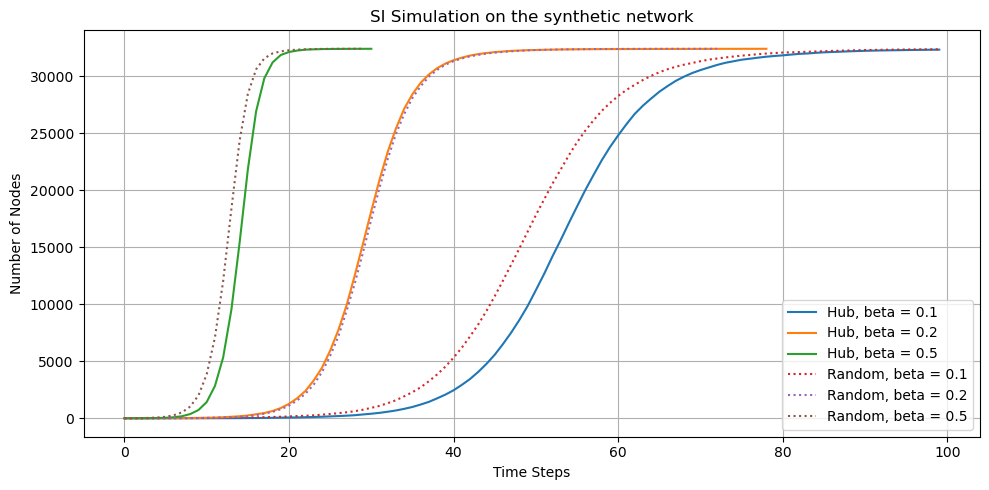

In [25]:
gamma = 0.23    # Recovery probability
initial_infected = 1
sim_history = {}
plt.figure(figsize=(10, 5))
time_steps = 100  # Adjust based on required duration
degrees = dict(G.degree())
# Loop through thresholds from 0.1 to 0.9
for case in [1, 2]:
    for beta in [0.1, 0.2, 0.5]:
        # Initialize states
        nodes = list(G.nodes)
        n = len(nodes)
        if case==2:
            infected_nodes = np.random.choice(nodes, replace=False)
        elif case==1:
            
            max_degree = max(degrees.values())

            # Find all nodes with the minimum degree
            max_degree_nodes = [node for node, degree in degrees.items() if degree == max_degree]

            # Choose one randomly
            infected_node = np.random.choice(max_degree_nodes, replace=False)
        else:
            min_degree = min(degrees.values())

        # Find all nodes with the minimum degree
            min_degree_nodes = [node for node, degree in degrees.items() if degree == min_degree]

            # Choose one randomly
            infected_node = np.random.choice(min_degree_nodes, replace=False)

        node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
        node_states[infected_nodes] = 'I'
        # node_states[102] = 'R'  # Make sure a node starts as recovered

        # Record initial state counts
        susceptible_counts = [n - 1]  # Assuming 1 initial infected
        infected_counts = [1]  # Assuming 1 initial infected

        # Simulation loop
        for t in range(1, time_steps):
            new_states = node_states.copy()
            for node in nodes:
                if node_states[node] == 'I':  # Infected node
                    # Spread to neighbors
                    for neighbor in G.neighbors(node):
                        if node_states[neighbor] == 'S' and np.random.rand() < beta:
                            new_states[neighbor] = 'I'

            # Update states
            node_states = new_states
            susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
            infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))

            # Break if no more infected
            if susceptible_counts[-1] == 0:
                break

        sim_history.update({f"{case},{beta}": infected_counts})
        print(f"{case},{beta}: ",max(infected_counts), len(infected_counts))
print(sim_history)
plt.title("SI Simulation on the synthetic network")
for key in sim_history:
    if key[0]=="1":
        plt.plot(sim_history[key], label=f"Hub, beta = {key[2:]}")
    if key[0]=="2":
        plt.plot(sim_history[key], label=f"Random, beta = {key[2:]}", linestyle ='dotted')
plt.xlabel("Time Steps")
plt.ylabel("Number of Nodes")
#plt.xticks(ticks = range(1, len(susceptible_counts)))
plt.legend(loc=4)
plt.grid()
plt.tight_layout()
plt.savefig("SI with different ifn rate on syn")
plt.show()

In [ ]:
p=[]
for k,v in degrees.items():
    if v==1 or v==2 or v==3:
        p.append(key)
print(len(p))

30276
